In [ ]:
!rm -rf ./data/trainingData0526

# Environment

In [ ]:
import tensorflow as tf

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

# Load data

In [ ]:
img_rows = 100
img_cols = 100
n_class = 10

# Download data from google drive

In [ ]:
%%time
zip_path = '/content/drive/MyDrive/ARC _AIoT 共用雲端/trainingData0528.zip'
!cp "{zip_path}" .
!unzip -q trainingData0528.zip -d './data'
!rm trainingData0528.zip

CPU times: user 96.4 ms, sys: 32.1 ms, total: 129 ms
Wall time: 17 s


In [ ]:
%%time
zip_path = '/content/drive/MyDrive/ARC _AIoT 共用雲端/trainingData0526.zip'
!cp "{zip_path}" .
!unzip -q trainingData0526.zip -d '.'
!rm trainingData0526.zip

CPU times: user 74 ms, sys: 38.5 ms, total: 113 ms
Wall time: 12.7 s


In [ ]:
import pathlib
data_root = pathlib.Path('./data')

In [ ]:
data_root26 = pathlib.Path('./trainingData0526')

# List all directory

In [ ]:
for item in data_root.iterdir():
  print(item)

data/2
data/0
data/8
data/7
data/3
data/6
data/5
data/1
data/4
data/9


In [ ]:
for item in data_root26.iterdir():
  print(item)

trainingData0526/2
trainingData0526/0
trainingData0526/8
trainingData0526/7
trainingData0526/3
trainingData0526/6
trainingData0526/5
trainingData0526/1
trainingData0526/4


In [ ]:
import random
all_image_paths = list(data_root.glob('*/*')) + list(data_root26.glob('*/*'))
all_image_paths = [str(path) for path in all_image_paths]
random.shuffle(all_image_paths)

image_count = len(all_image_paths)
image_count

9552

In [ ]:
all_image_paths[:10]

['data/2/two_171.jpg',
 'trainingData0526/6/six_226.jpg',
 'trainingData0526/2/two_102.jpg',
 'data/6/six_505.jpg',
 'data/9/nine_442.jpg',
 'data/8/eight_582.jpg',
 'data/8/eight_478.jpg',
 'trainingData0526/5/five_105.jpg',
 'trainingData0526/5/five_225.jpg',
 'data/5/five_77.jpg']

# Data visualization

In [ ]:
import IPython.display as display

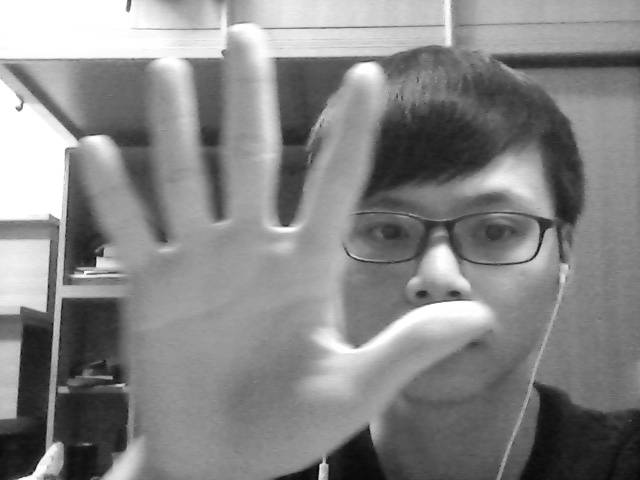

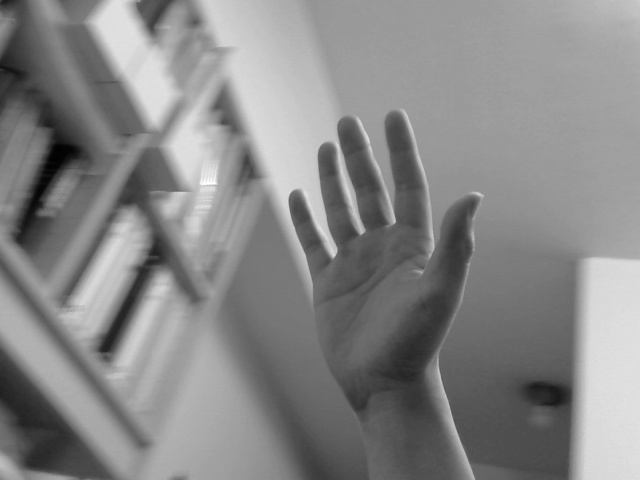

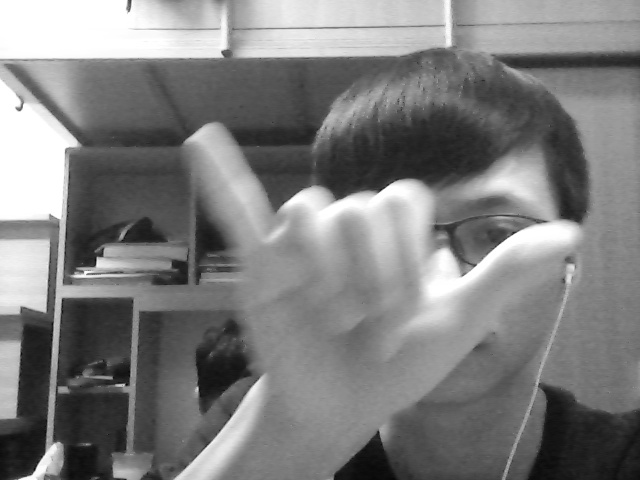

In [ ]:
for n in range(3):
  image_path = random.choice(all_image_paths)
  display.display(display.Image(image_path))

In [ ]:
label_names = sorted(item.name for item in data_root.glob('*/') if item.is_dir())
label_names

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [ ]:
label_to_index = dict((name, index) for index, name in enumerate(label_names))
label_to_index

{'0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9}

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
all_image_labels = [label_to_index[pathlib.Path(path).parent.name]
                    for path in all_image_paths]

test_labels = to_categorical(all_image_labels, n_class, dtype = 'float32')
print("First 10 labels indices: ", all_image_labels[:20])
print(test_labels[:20])

First 10 labels indices:  [2, 6, 2, 6, 9, 8, 8, 5, 5, 5, 7, 0, 1, 9, 5, 4, 5, 4, 1, 6]
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


In [ ]:
def preprocess_image(image):
  image = tf.image.decode_jpeg(image, channels=1)
  image = tf.image.resize(image, [img_rows, img_cols])

  return image

In [ ]:
def load_and_preprocess_image(path):
  image = tf.io.read_file(path)
  return preprocess_image(image)

In [ ]:
ds = tf.data.Dataset.from_tensor_slices((all_image_paths, test_labels))
# 元组被解压缩到映射函数的位置参数中
def load_and_preprocess_from_path_label(path, label):
  return load_and_preprocess_image(path), label

image_label = ds.map(load_and_preprocess_from_path_label)
print(image_label)

<MapDataset shapes: ((100, 100, 1), (10,)), types: (tf.float32, tf.float32)>


In [ ]:
BATCH_SIZE = 32


setDs = image_label.shuffle(buffer_size=image_count)
setDs = setDs.repeat()
setDs_Batch = setDs.batch(BATCH_SIZE)

setDs = setDs.prefetch(buffer_size=AUTOTUNE)
print(setDs)
print(setDs_Batch)

<PrefetchDataset shapes: ((100, 100, 1), (10,)), types: (tf.float32, tf.float32)>
<BatchDataset shapes: ((None, 100, 100, 1), (None, 10)), types: (tf.float32, tf.float32)>


In [ ]:
trainingSet = setDs.skip(int(image_count*0.2))
trainingSet_Batch = setDs_Batch.take(int(image_count*0.2))

testingSet = setDs.take(int(image_count*0.2))
testingSet_Batch = setDs_Batch.take(int(image_count*0.2))

In [ ]:
print(trainingSet)
print(trainingSet_Batch)
print(testingSet)
print(testingSet_Batch)

<SkipDataset shapes: ((100, 100, 1), (10,)), types: (tf.float32, tf.float32)>
<TakeDataset shapes: ((None, 100, 100, 1), (None, 10)), types: (tf.float32, tf.float32)>
<TakeDataset shapes: ((100, 100, 1), (10,)), types: (tf.float32, tf.float32)>
<TakeDataset shapes: ((None, 100, 100, 1), (None, 10)), types: (tf.float32, tf.float32)>


# Image preprocessing

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import gc

12

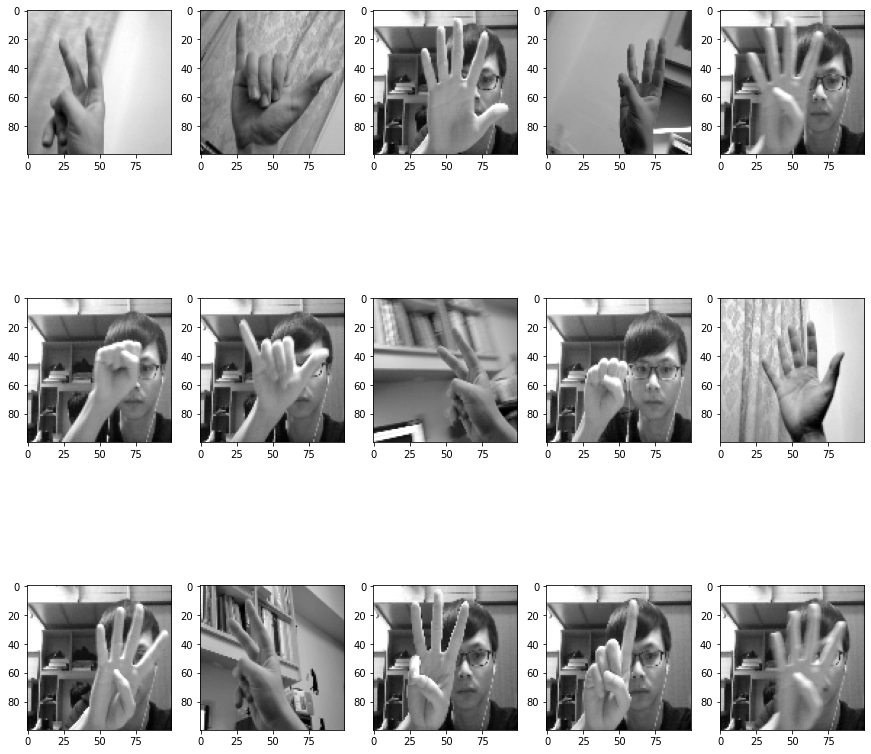

In [ ]:
def plot_dataset(dataset, num=5):
    plt.figure(figsize=(15, 15))
    plot_index = 0
    for image, label in dataset.take(num):
        image = image.numpy()
        label = label.numpy()
        
        plot_index+=1
        plt.subplot(3, 5, plot_index)
        plt.imshow(image.squeeze(),'gray')

plot_dataset(trainingSet, 15)
gc.collect()

In [ ]:
pip install tensorflow_addons

     |████████████████████████████████| 686kB 7.5MB/s 


In [ ]:
import tensorflow_addons as tfa

In [ ]:
def image_transpose(image):
    rand = tf.random.uniform(shape=[], minval=0.0, maxval=1.0, dtype=tf.float32) 
    image = tf.cond(rand < 0.5, 
                    lambda: tf.identity(image), 
                    lambda: tf.image.transpose(image)) 
    return image

def image_flip(image: tf.Tensor) -> tf.Tensor:
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_flip_up_down(image)
    return image

def image_rotate(image):
    # image = tf.image.rot90(image, tf.random.uniform(shape=[], minval=0, maxval=4, dtype=tf.int32))
    rand = tf.random.uniform(shape=[], minval=0.0, maxval=1.0, dtype=tf.float32) 
    def random_rotate(image):
        image = tfa.image.rotate(
            image, tf.random.uniform(shape=[], minval=-30 * np.pi / 180, maxval=30 * np.pi / 180, dtype=tf.float32))
        return image
    
    image = tf.cond(rand < 0.5, 
                    # lambda: tf.identity(image), 
                    lambda: random_rotate(image),
                    lambda: random_rotate(image)) 
    return image  

def image_color(image: tf.Tensor) -> tf.Tensor:
    image = tf.image.random_saturation(image, lower=0.5, upper=3)
    image = tf.image.random_brightness(image, max_delta=0.2)
    image = tf.image.random_contrast(image, lower=0.8, upper=1)
    image = tf.image.random_hue(image, max_delta=0.03)
    image = tf.clip_by_value(image, clip_value_min=0, clip_value_max=1)
    return image

def image_inversion(image: tf.Tensor) -> tf.Tensor:
    rand = tf.random.uniform(shape=[], minval=0.0, maxval=1.0, dtype=tf.float32)
    image = tf.cond(rand < 0.8, 
                    lambda: tf.identity(image), 
                    lambda: tf.math.add(tf.math.multiply(image, -1), 1))
    return image

def image_zoom(image: tf.Tensor, min_zoom=0.8, max_zoom=1.0) -> tf.Tensor:
    image_width, image_height, image_colors = image.shape
    crop_size = (image_width, image_height)

    # Generate crop settings, ranging from a 1% to 20% crop.
    scales = list(np.arange(min_zoom, max_zoom, 0.01))
    boxes = np.zeros((len(scales), 4))

    for i, scale in enumerate(scales):
        x1 = y1 = 0.5 - (0.5 * scale)
        x2 = y2 = 0.5 + (0.5 * scale)
        boxes[i] = [x1, y1, x2, y2]

    def random_crop(img):
        # Create different crops for an image
        crops = tf.image.crop_and_resize(
            [img],
            boxes=boxes,
            box_indices=np.zeros(len(scales)),
            crop_size=crop_size
        )
        # Return a random crop
        return crops[tf.random.uniform(shape=[], minval=0, maxval=len(scales), dtype=tf.int32)]

    choice = tf.random.uniform(shape=[], minval=0., maxval=1., dtype=tf.float32)

    # Only apply cropping 50% of the time
    return tf.cond(choice < 0.5, lambda: image, lambda: random_crop(image))

In [ ]:
def augment_data(image, label):
    # image = image_flip(image)
    # image = image_color(image)
    image = image_zoom(image)
    # image = image_transpose(image)
    image = image_inversion(image)
    image = image_rotate(image)
    return image, label

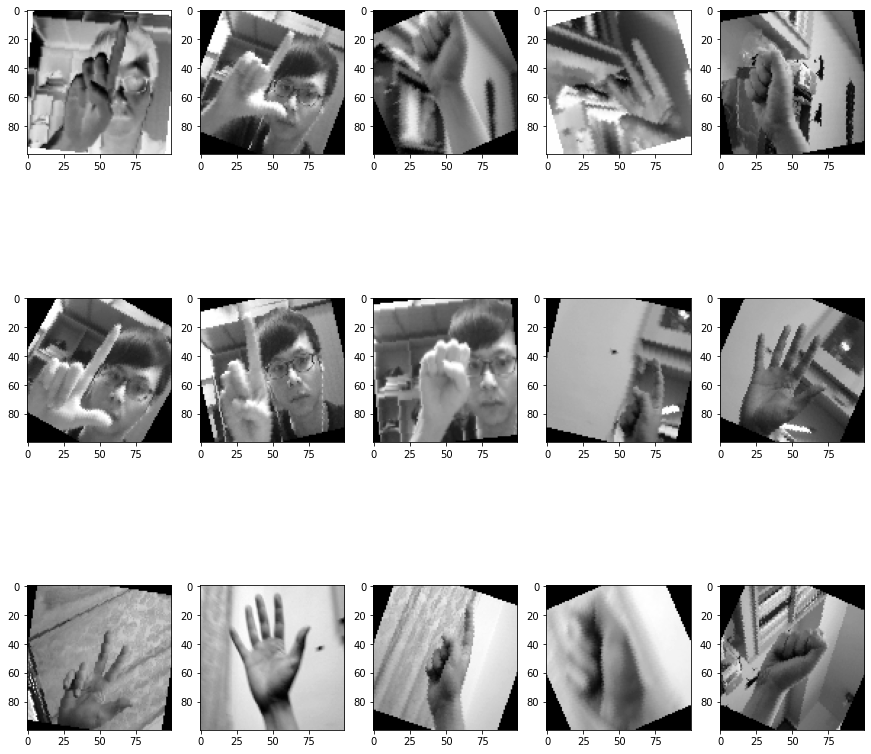

In [ ]:
trainingSet = trainingSet.map(augment_data)

plot_dataset(trainingSet,15)

# Create model

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.models import Model
from functools import partial

In [ ]:
conv1x1 = partial(layers.Conv2D, kernel_size=1, activation='relu')
conv3x3 = partial(layers.Conv2D, kernel_size=3, padding='same', activation='relu')
conv5x5 = partial(layers.Conv2D, kernel_size=5, padding='same', activation='relu')

def inception_module(in_tensor, c1, c3_1, c3, c5_1, c5, pp):
  conv1 = conv1x1(c1)(in_tensor)
  conv3_1 = conv1x1(c3_1)(in_tensor)
  conv3 = conv3x3(c3)(conv3_1) 
  conv5_1 = conv1x1(c5_1)(in_tensor) 
  conv5 = conv5x5(c5)(conv5_1) 
  pool_conv = conv1x1(pp)(in_tensor) 
  pool = layers.MaxPool2D(3, strides=1, padding='same')(pool_conv) 
  merged = layers.Concatenate(axis=-1)([conv1, conv3, conv5, pool]) 
  return merged 

def aux_clf(in_tensor): 
  avg_pool = layers.AvgPool2D(5, 3)(in_tensor)
  conv = conv1x1(128)(avg_pool)
  flattened = layers.Flatten()(conv)
  dense = layers.Dense(1024, activation='relu')(flattened)
  dropout = layers.Dropout(0.7)(dense)
  out = layers.Dense(n_class, activation='softmax')(dropout)
  return out

def inception_net(in_shape=(224,224,3), n_classes=1000, opt='sgd'): 
  in_layer = layers.Input(in_shape) 
  rescale = layers.experimental.preprocessing.Rescaling(1./255),
  conv1 = layers.Conv2D(64, 7, strides=2, activation='relu', padding='same')(in_layer) 
  pad1 = layers.ZeroPadding2D()(conv1) 
  pool1 = layers.MaxPool2D(3, 2)(pad1) 
  conv2_1 = conv1x1(64)(pool1) 
  conv2_2 = conv3x3(192)(conv2_1) 
  pad2 = layers.ZeroPadding2D()(conv2_2) 
  pool2 = layers.MaxPool2D(3, 2)(pad2) 
  inception3a = inception_module(pool2, 64, 96, 128, 16, 32, 32) 
  inception3b = inception_module(inception3a, 128, 128, 192, 32, 96, 64) 
  pad3 = layers.ZeroPadding2D()(inception3b) 
  pool3 = layers.MaxPool2D(3, 2)(pad3) 
  inception4a = inception_module(pool3, 192, 96, 208, 16, 48, 64) 
  inception4b = inception_module(inception4a, 160, 112, 224, 24, 64, 64) 
  inception4c = inception_module(inception4b, 128, 128, 256, 24, 64, 64) 
  inception4d = inception_module(inception4c, 112, 144, 288, 32, 48, 64) 
  inception4e = inception_module(inception4d, 256, 160, 320, 32, 128, 128) 
  pad4 = layers.ZeroPadding2D()(inception4e) 
  pool4 = layers.MaxPool2D(3, 2)(pad4) 
  aux_clf1 = aux_clf(inception4a) 
  aux_clf2 = aux_clf(inception4d) 
  inception5a = inception_module(pool4, 256, 160, 320, 32, 128, 128) 
  inception5b = inception_module(inception5a, 384, 192, 384, 48, 128, 128) 
  pad5 = layers.ZeroPadding2D()(inception5b) 
  pool5 = layers.MaxPool2D(3, 2)(pad5) 
  avg_pool = layers.GlobalAvgPool2D()(pool5) 
  dropout = layers.Dropout(0.4)(avg_pool) 
  preds = layers.Dense(n_class, activation='softmax')(dropout) 
  model = Model(in_layer, [preds, aux_clf1, aux_clf2]) 
  # model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"]) 
  return model 

In [ ]:
model = inception_net(in_shape=(img_rows, img_cols, 1), n_classes=n_class) 

# Resnet50

In [ ]:

backend = None
models = None
keras_utils = None


def identity_block(input_tensor, kernel_size, filters, stage, block):
    """The identity block is the block that has no conv layer at shortcut.
    # Arguments
        input_tensor: input tensor
        kernel_size: default 3, the kernel size of
            middle conv layer at main path
        filters: list of integers, the filters of 3 conv layer at main path
        stage: integer, current stage label, used for generating layer names
        block: 'a','b'..., current block label, used for generating layer names
    # Returns
        Output tensor for the block.
    """
    filters1, filters2, filters3 = filters
    # if backend.image_data_format() == 'channels_last':
    #     bn_axis = 3
    # else:
    #     bn_axis = 1
    bn_axis = 1
    
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'

    x = layers.Conv2D(filters1, (1, 1),
                      kernel_initializer='he_normal',
                      name=conv_name_base + '2a')(input_tensor)
    x = layers.BatchNormalization(axis=bn_axis, name=bn_name_base + '2a')(x)
    x = layers.Activation('relu')(x)

    x = layers.Conv2D(filters2, kernel_size,
                      padding='same',
                      kernel_initializer='he_normal',
                      name=conv_name_base + '2b')(x)
    x = layers.BatchNormalization(axis=bn_axis, name=bn_name_base + '2b')(x)
    x = layers.Activation('relu')(x)

    x = layers.Conv2D(filters3, (1, 1),
                      kernel_initializer='he_normal',
                      name=conv_name_base + '2c')(x)
    x = layers.BatchNormalization(axis=bn_axis, name=bn_name_base + '2c')(x)

    x = layers.add([x, input_tensor])
    x = layers.Activation('relu')(x)
    return x


def conv_block(input_tensor,
               kernel_size,
               filters,
               stage,
               block,
               strides=(2, 2)):
    """A block that has a conv layer at shortcut.
    # Arguments
        input_tensor: input tensor
        kernel_size: default 3, the kernel size of
            middle conv layer at main path
        filters: list of integers, the filters of 3 conv layer at main path
        stage: integer, current stage label, used for generating layer names
        block: 'a','b'..., current block label, used for generating layer names
        strides: Strides for the first conv layer in the block.
    # Returns
        Output tensor for the block.
    Note that from stage 3,
    the first conv layer at main path is with strides=(2, 2)
    And the shortcut should have strides=(2, 2) as well
    """
    filters1, filters2, filters3 = filters
    # if backend.image_data_format() == 'channels_last':
    #     bn_axis = 3
    # else:
    #     bn_axis = 1

    bn_axis = 1
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'

    x = layers.Conv2D(filters1, (1, 1), strides=strides,
                      kernel_initializer='he_normal',
                      name=conv_name_base + '2a')(input_tensor)
    x = layers.BatchNormalization(axis=bn_axis, name=bn_name_base + '2a')(x)
    x = layers.Activation('relu')(x)

    x = layers.Conv2D(filters2, kernel_size, padding='same',
                      kernel_initializer='he_normal',
                      name=conv_name_base + '2b')(x)
    x = layers.BatchNormalization(axis=bn_axis, name=bn_name_base + '2b')(x)
    x = layers.Activation('relu')(x)

    x = layers.Conv2D(filters3, (1, 1),
                      kernel_initializer='he_normal',
                      name=conv_name_base + '2c')(x)
    x = layers.BatchNormalization(axis=bn_axis, name=bn_name_base + '2c')(x)

    shortcut = layers.Conv2D(filters3, (1, 1), strides=strides,
                             kernel_initializer='he_normal',
                             name=conv_name_base + '1')(input_tensor)
    shortcut = layers.BatchNormalization(
        axis=bn_axis, name=bn_name_base + '1')(shortcut)

    x = layers.add([x, shortcut])
    x = layers.Activation('relu')(x)
    return x


def ResNet50(include_top=True,
             weights='imagenet',
             input_tensor=None,
             input_shape=None,
             pooling=None,
             classes=10,
             **kwargs):
    """Instantiates the ResNet50 architecture.
    Optionally loads weights pre-trained on ImageNet.
    Note that the data format convention used by the model is
    the one specified in your Keras config at `~/.keras/keras.json`.
    # Arguments
        include_top: whether to include the fully-connected
            layer at the top of the network.
        weights: one of `None` (random initialization),
              'imagenet' (pre-training on ImageNet),
              or the path to the weights file to be loaded.
        input_tensor: optional Keras tensor (i.e. output of `layers.Input()`)
            to use as image input for the model.
        input_shape: optional shape tuple, only to be specified
            if `include_top` is False (otherwise the input shape
            has to be `(224, 224, 3)` (with `channels_last` data format)
            or `(3, 224, 224)` (with `channels_first` data format).
            It should have exactly 3 inputs channels,
            and width and height should be no smaller than 32.
            E.g. `(200, 200, 3)` would be one valid value.
        pooling: Optional pooling mode for feature extraction
            when `include_top` is `False`.
            - `None` means that the output of the model will be
                the 4D tensor output of the
                last convolutional block.
            - `avg` means that global average pooling
                will be applied to the output of the
                last convolutional block, and thus
                the output of the model will be a 2D tensor.
            - `max` means that global max pooling will
                be applied.
        classes: optional number of classes to classify images
            into, only to be specified if `include_top` is True, and
            if no `weights` argument is specified.
    # Returns
        A Keras model instance.
    # Raises
        ValueError: in case of invalid argument for `weights`,
            or invalid input shape.
    """
    global backend, layers, models, keras_utils
    # backend, layers, models, keras_utils = get_submodules_from_kwargs(kwargs)

    bn_axis = 1

    if input_tensor is None:
        img_input = layers.Input(shape=input_shape)
    else:
        if not backend.is_keras_tensor(input_tensor):
            img_input = layers.Input(tensor=input_tensor, shape=input_shape)
        else:
            img_input = input_tensor
    # if backend.image_data_format() == 'channels_last':
    #     bn_axis = 3
    # else:
    #     bn_axis = 1

    x = layers.ZeroPadding2D(padding=(3, 3), name='conv1_pad')(img_input)
    x = layers.Conv2D(64, (7, 7),
                      strides=(2, 2),
                      padding='valid',
                      kernel_initializer='he_normal',
                      name='conv1')(x)
    x = layers.BatchNormalization(axis=bn_axis, name='bn_conv1')(x)
    x = layers.Activation('relu')(x)
    x = layers.ZeroPadding2D(padding=(1, 1), name='pool1_pad')(x)
    x = layers.MaxPooling2D((3, 3), strides=(2, 2))(x)

    x = conv_block(x, 3, [64, 64, 256], stage=2, block='a', strides=(1, 1))
    x = identity_block(x, 3, [64, 64, 256], stage=2, block='b')
    x = identity_block(x, 3, [64, 64, 256], stage=2, block='c')

    x = conv_block(x, 3, [128, 128, 512], stage=3, block='a')
    x = identity_block(x, 3, [128, 128, 512], stage=3, block='b')
    x = identity_block(x, 3, [128, 128, 512], stage=3, block='c')
    x = identity_block(x, 3, [128, 128, 512], stage=3, block='d')

    x = conv_block(x, 3, [256, 256, 1024], stage=4, block='a')
    x = identity_block(x, 3, [256, 256, 1024], stage=4, block='b')
    x = identity_block(x, 3, [256, 256, 1024], stage=4, block='c')
    x = identity_block(x, 3, [256, 256, 1024], stage=4, block='d')
    x = identity_block(x, 3, [256, 256, 1024], stage=4, block='e')
    x = identity_block(x, 3, [256, 256, 1024], stage=4, block='f')

    x = conv_block(x, 3, [512, 512, 2048], stage=5, block='a')
    x = identity_block(x, 3, [512, 512, 2048], stage=5, block='b')
    x = identity_block(x, 3, [512, 512, 2048], stage=5, block='c')

    if include_top:
        x = layers.GlobalAveragePooling2D(name='avg_pool')(x)
        x = layers.Dense(classes, activation='softmax', name='fc1000')(x)
    else:
        if pooling == 'avg':
            x = layers.GlobalAveragePooling2D()(x)
        elif pooling == 'max':
            x = layers.GlobalMaxPooling2D()(x)
        else:
            warnings.warn('The output shape of `ResNet50(include_top=False)` '
                          'has been changed since Keras 2.2.0.')

    # Ensure that the model takes into account
    # any potential predecessors of `input_tensor`.
    if input_tensor is not None:
        inputs = keras_utils.get_source_inputs(input_tensor)
    else:
        inputs = img_input
    # Create model.
    model = Model(inputs, x, name='resnet50')

    return model

In [ ]:
model = ResNet50(include_top=True,
             weights='imagenet',
             input_tensor=None,
             input_shape=(img_rows, img_cols, 1),
             pooling=None,
             classes=n_class,)

# VGG

In [ ]:
def VGG16Net(width, height, depth, classes):
    
    model = Sequential()
    
    model.add(Conv2D(64,(3,3),strides=(1,1),input_shape=(width, height, depth),padding='same',activation='relu'))
    model.add(Conv2D(64,(3,3),strides=(1,1),padding='same',activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(128,(3,2),strides=(1,1),padding='same',activation='relu'))
    model.add(Conv2D(128,(3,3),strides=(1,1),padding='same',activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(256,(3,3),strides=(1,1),padding='same',activation='relu'))
    model.add(Conv2D(256,(3,3),strides=(1,1),padding='same',activation='relu'))
    model.add(Conv2D(256,(3,3),strides=(1,1),padding='same',activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(512,(3,3),strides=(1,1),padding='same',activation='relu'))
    model.add(Conv2D(512,(3,3),strides=(1,1),padding='same',activation='relu'))
    model.add(Conv2D(512,(3,3),strides=(1,1),padding='same',activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(512,(3,3),strides=(1,1),padding='same',activation='relu'))
    model.add(Conv2D(512,(3,3),strides=(1,1),padding='same',activation='relu'))
    model.add(Conv2D(512,(3,3),strides=(1,1),padding='same',activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Flatten())
    model.add(Dense(4096,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4096,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1000,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(17,activation='softmax'))
    
    return model

In [ ]:
model = VGG16Net(img_rows,img_cols,1,n_class)

In [ ]:
print(model.summary())

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Total params: 23,498,258
Trainable params: 23,496,974
Non-trainable params: 1,284
__________________________________________________________________________________________________
None


# Train model

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

steps_per_epoch = image_count // BATCH_SIZE
validation_steps = image_count*0.2 // BATCH_SIZE

print('steps_per_epoch:', steps_per_epoch)
print('validation_steps:', validation_steps)

steps_per_epoch: 298
validation_steps: 59.0


In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(patience=5, monitor='val_accuracy')

In [ ]:
epoch = 25

In [ ]:
history = model.fit(trainingSet_Batch.repeat(),
           validation_data=testingSet_Batch.repeat(),
           epochs=epoch, 
           steps_per_epoch=steps_per_epoch,
           validation_steps=validation_steps,
           callbacks=[early_stopping],
           verbose=1)

Epoch 1/25
298/298 [==============================] - 68s 185ms/step - loss: 28272.9172 - accuracy: 0.2164 - val_loss: 1.7224 - val_accuracy: 0.6245
Epoch 2/25
298/298 [==============================] - 54s 182ms/step - loss: 1.4157 - accuracy: 0.6848 - val_loss: 0.5693 - val_accuracy: 0.8337
Epoch 3/25
298/298 [==============================] - 55s 184ms/step - loss: 0.4234 - accuracy: 0.8849 - val_loss: 1.1638 - val_accuracy: 0.7092
Epoch 4/25
298/298 [==============================] - 55s 184ms/step - loss: 0.2524 - accuracy: 0.9254 - val_loss: 0.0285 - val_accuracy: 0.9910
Epoch 5/25
298/298 [==============================] - 55s 184ms/step - loss: 0.1146 - accuracy: 0.9664 - val_loss: 0.3918 - val_accuracy: 0.8962
Epoch 6/25
298/298 [==============================] - 55s 184ms/step - loss: 0.4614 - accuracy: 0.8929 - val_loss: 0.1184 - val_accuracy: 0.9635
Epoch 7/25
298/298 [==============================] - 63s 212ms/step - loss: 0.2206 - accuracy: 0.9442 - val_loss: 0.1182 - va

# Plot history

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [ ]:
from math import ceil

In [ ]:
plot_size = ceil(len(history.history.keys())/2)

In [ ]:
plt.subplot(2,2,1)
plt.plot(range(epoch), history.history['dense_26_accuracy'], label='Training Accuracy')
plt.plot(range(epoch), history.history['val_dense_26_accuracy'], label='Validation Accuracy')
plt.title('dense_26')

plt.subplot(2,2,2)
plt.plot(range(epoch), history.history['dense_28_accuracy'], label='Training Accuracy')
plt.plot(range(epoch), history.history['val_dense_28_accuracy'], label='Validation Accuracy')
plt.title('dense_28')

plt.subplot(2,2,3)
plt.plot(range(epoch), history.history['dense_29_accuracy'], label='Training Accuracy')
plt.plot(range(epoch), history.history['val_dense_29_accuracy'], label='Validation Accuracy')
plt.title('dense_29')

plt.subplot(2,2,4)
plt.plot(range(epoch), history.history['loss'], label='Training Loss')
plt.plot(range(epoch), history.history['val_loss'], label='Validation Loss')

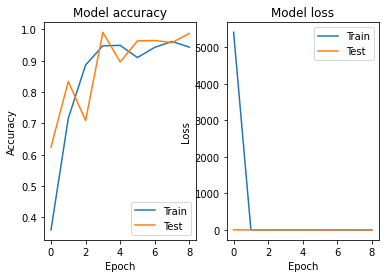

In [ ]:
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')

plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

# Predict image

In [ ]:
!pip install opencv-python
from google.colab.patches import cv2_imshow

In [ ]:
import cv2
wCam, hCam = img_rows, img_cols

In [ ]:
print(random.choice(all_image_paths))

In [ ]:
img = cv2.imread('./three_261.jpg',cv2.IMREAD_UNCHANGED)
# gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

cv2_imshow(img)
gray = cv2.resize(img, (img_rows, img_cols), interpolation=cv2.INTER_CUBIC)
reshapeimg = gray.reshape(1,img_rows, img_cols, 1) 
transimg = reshapeimg.astype('float32')
predict = model.predict(transimg)

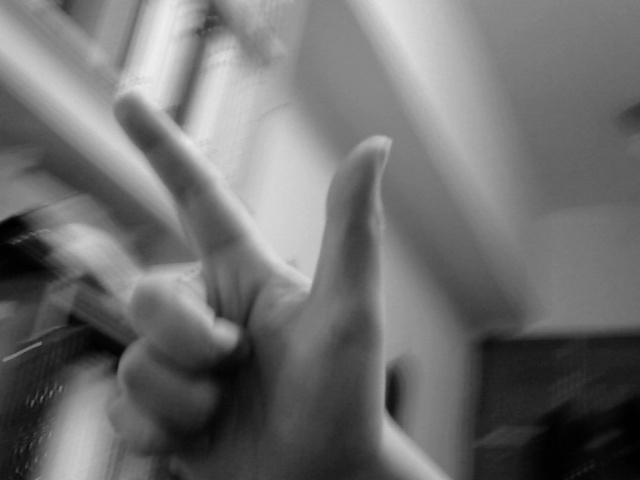

In [ ]:
img = cv2.imread('./'+random.choice(all_image_paths),cv2.IMREAD_UNCHANGED)
# gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

cv2_imshow(img)
gray = cv2.resize(img, (img_rows, img_cols), interpolation=cv2.INTER_CUBIC)
reshapeimg = gray.reshape(1,img_rows, img_cols, 1) 
transimg = reshapeimg.astype('float32')
predict = model.predict(transimg)

In [ ]:
print(predict)
print(np.argmax(predict))
# print(np.argmax(predict[0]))
# print(np.argmax(predict[1]))
# print(np.argmax(predict[2]))

[[1.9181559e-03 2.5668482e-08 2.7893499e-08 8.0877719e-08 2.9322572e-10
  6.3292576e-15 9.0538005e-15 9.9808168e-01 1.1926771e-13 6.0302763e-09]]
7


In [ ]:
# Save weights of this model
model.save_weights('./my_model.h5')

# Draw confusion matrix

In [ ]:
from sklearn.metrics import classification_report

import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

randomlist = random.sample(range(0, image_count), int(image_count*0.2)) 
y_predict = []
y_true = []
for i in randomlist:
  img = cv2.imread('./'+all_image_paths[i],cv2.IMREAD_UNCHANGED)
  gray = cv2.resize(img, (img_rows, img_cols), interpolation=cv2.INTER_CUBIC)
  reshapeimg = gray.reshape(1,img_rows, img_cols, 1) 
  transimg = reshapeimg.astype('float32')
  y_predict.append(np.argmax(model.predict(transimg)))
  y_true.append(np.argmax(test_labels[i]))
# y_predict = model.predict(testingSet_Batch, batch_size=None, verbose=0, steps=None)

# y_pred = y_predict #[np.argmax([i[0]]) for i in y_predict]
# y_true = [np.argmax([i.numpy()]) for _, i in testingSet_Batch]
target_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       196
           1       0.97      1.00      0.98       207
           2       1.00      0.98      0.99       211
           3       0.99      1.00      0.99       209
           4       1.00      0.97      0.99       213
           5       0.96      1.00      0.98       167
           6       1.00      1.00      1.00       209
           7       0.98      0.99      0.99       195
           8       1.00      0.96      0.98       188
           9       0.99      1.00      1.00       115

    accuracy                           0.99      1910
   macro avg       0.99      0.99      0.99      1910
weighted avg       0.99      0.99      0.99      1910

**************************************************************
Normalized confusion matrix
[[1.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         1.         0.         0.      

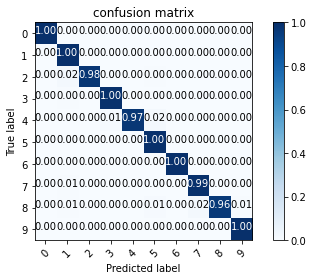

In [ ]:
print(classification_report(y_true, y_predict, target_names=target_names))
print ("**************************************************************")

plt.figure()
cnf_matrix = confusion_matrix(y_true, y_predict)
plot_confusion_matrix(cnf_matrix, classes=target_names,normalize=True,
                    title='confusion matrix')

plt.show()